In [17]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [18]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [19]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



In [20]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [21]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [22]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [23]:
prediction = Dense(len(folders), activation='softmax')(x)


In [24]:

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [25]:
# view the structure of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [26]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [27]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [28]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 223 images belonging to 3 classes.


In [29]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [30]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\amarn\AppData\Local\Temp\ipykernel_13880\4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
7/7 [==============================] - 33s 4s/step - loss: 7.2393 - accuracy: 0.3543 - val_loss: 13.2189 - val_accuracy: 0.3276
Epoch 2/50
7/7 [==============================] - 18s 3s/step - loss: 5.6339 - accuracy: 0.3722 - val_loss: 2.0755 - val_accuracy: 0.5172
Epoch 3/50
7/7 [==============================] - 17s 3s/step - loss: 3.7603 - accuracy: 0.3991 - val_loss: 3.9037 - val_accuracy: 0.2414
Epoch 4/50
7/7 [==============================] - 17s 3s/step - loss: 2.3081 - accuracy: 0.3946 - val_loss: 2.4402 - val_accuracy: 0.2414
Epoch 5/50
7/7 [==============================] - 17s 3s/step - loss: 1.3680 - accuracy: 0.4888 - val_loss: 1.4684 - val_accuracy: 0.4483
Epoch 6/50
7/7 [==============================] - 17s 3s/step - loss: 1.3284 - accuracy: 0.4619 - val_loss: 2.3144 - val_accuracy: 0.3276
Epoch 7/50
7/7 [==============================] - 17s 2s/step - loss: 1.1904 - accuracy: 0.4798 - val_loss: 1.3590 - val_accuracy: 0.3966
Epoch 8/50
7/7 [=================

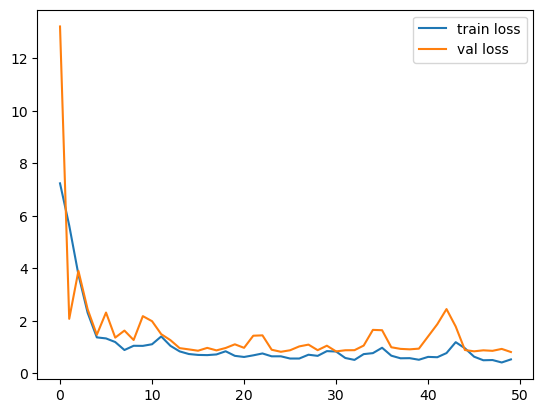

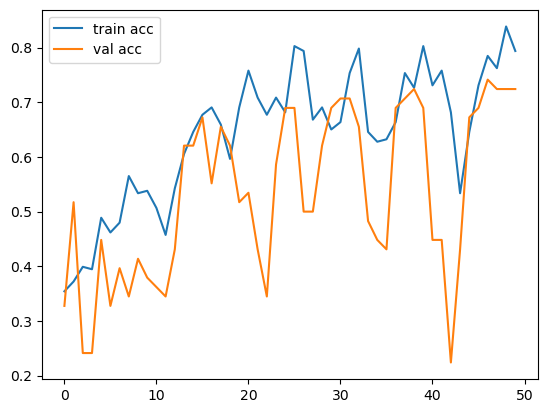

<Figure size 640x480 with 0 Axes>

In [31]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [32]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [33]:
y_pred = model.predict(test_set)


2/2 [==============================] - 5s 1s/step


In [34]:
y_pred

array([[1.83177774e-03, 1.49090722e-01, 8.49077463e-01],
       [5.34530878e-02, 7.69254982e-01, 1.77291870e-01],
       [1.86239965e-02, 9.17463720e-01, 6.39122725e-02],
       [9.58780646e-02, 7.72992790e-01, 1.31129131e-01],
       [1.01587169e-01, 8.43256891e-01, 5.51559590e-02],
       [4.27023113e-01, 3.59236479e-01, 2.13740349e-01],
       [1.30697921e-01, 5.51767826e-01, 3.17534238e-01],
       [8.87070200e-05, 9.96299028e-01, 3.61224986e-03],
       [6.80157363e-01, 2.20849723e-01, 9.89928171e-02],
       [3.84118284e-05, 7.30336469e-04, 9.99231279e-01],
       [9.62266922e-02, 8.33635569e-01, 7.01377690e-02],
       [1.21915460e-01, 3.34123403e-01, 5.43960989e-01],
       [2.72974193e-01, 1.64666083e-02, 7.10559189e-01],
       [1.09211646e-01, 3.27684164e-01, 5.63104093e-01],
       [2.76462138e-01, 4.93387610e-01, 2.30150238e-01],
       [4.07549053e-01, 4.67363358e-01, 1.25087619e-01],
       [5.12237400e-02, 2.88038164e-01, 6.60738111e-01],
       [6.27280772e-01, 1.84938

In [35]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [36]:
y_pred

array([2, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 1, 2,
       1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1], dtype=int64)

In [40]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [41]:
model=load_model('model_resnet50.h5')

In [43]:
# img_data

In [44]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [46]:
x= image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [47]:
x.shape

(224, 224, 3)

In [49]:
x=x/255
x

array([[[0.00387543, 0.00387543, 0.00387543],
        [0.00387543, 0.00387543, 0.00387543],
        [0.00387543, 0.00387543, 0.00387543],
        ...,
        [0.00301423, 0.00287582, 0.00264514],
        [0.00333718, 0.00319877, 0.00296809],
        [0.00373702, 0.00359862, 0.00336794]],

       [[0.00387543, 0.00387543, 0.00387543],
        [0.00387543, 0.00387543, 0.00387543],
        [0.00387543, 0.00387543, 0.00387543],
        ...,
        [0.00376778, 0.00376778, 0.00364475],
        [0.00373702, 0.00373702, 0.00361399],
        [0.00372165, 0.00372165, 0.00359862]],

       [[0.00387543, 0.00387543, 0.00387543],
        [0.00387543, 0.00387543, 0.00387543],
        [0.00387543, 0.00387543, 0.00387543],
        ...,
        [0.00369089, 0.0038293 , 0.00381392],
        [0.00372165, 0.00386005, 0.00384468],
        [0.00372165, 0.00386005, 0.00384468]],

       ...,

       [[0.00290657, 0.00318339, 0.00352172],
        [0.00292195, 0.00316801, 0.00352172],
        [0.00292195, 0

In [50]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [51]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[1.5721502e-11, 3.4762819e-09, 1.0000000e+00]], dtype=float32)

In [52]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 156ms/step


In [57]:
a

array([2], dtype=int64)